<a href="https://colab.research.google.com/github/Kushagra651/Clustering_Algos/blob/main/KmeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
%matplotlib inline

In [7]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=3,random_state=42)

In [8]:
X.shape

(1000, 2)

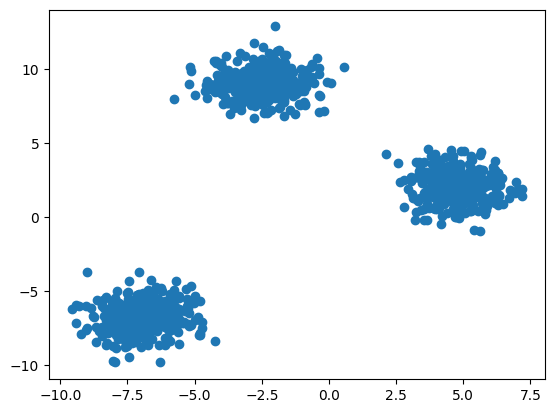

In [11]:
plt.scatter(X[:,0], X[:,1])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [13]:
from sklearn.cluster import KMeans

In [14]:
#elbow way to find the value of k(manually)

In [15]:
wcss = []
for k in range (1,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

In [16]:
print(wcss)

[44450.72387542032, 12741.823357662128, 1329.7219815435365, 1176.4269261372528, 1024.4372899473685, 854.1378528948278, 756.5923257499098, 699.4395448015171, 653.7809187868188, 546.7275801982704]


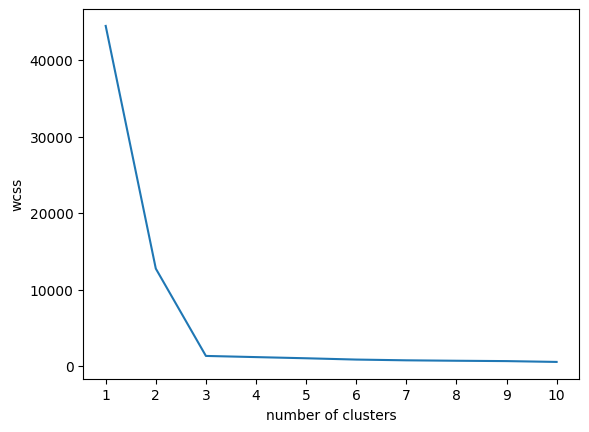

In [17]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()

In [18]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [21]:
y_labels = kmeans.fit_predict(X_train)

In [24]:
y_test_labels = kmeans.predict(X_test)

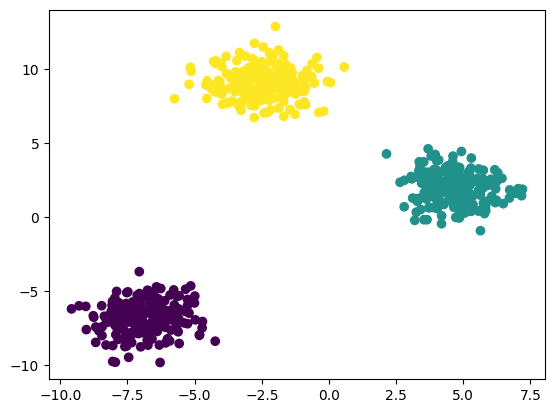

In [22]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

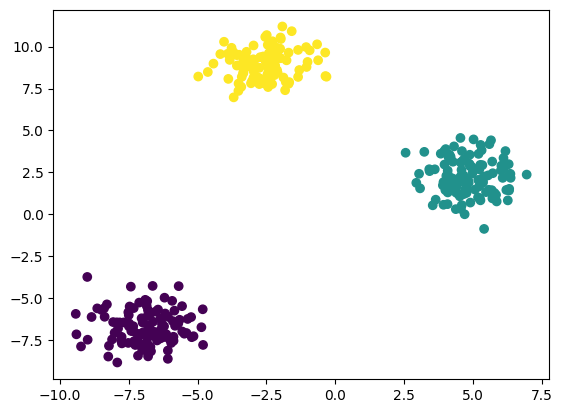

In [25]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [26]:
!pip install kneed

In [27]:
from kneed import KneeLocator

In [30]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
print(kl.elbow)

3


In [32]:
from sklearn.metrics import silhouette_score

In [34]:
sillhoutte_coeff = []
for k in range (2,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train,kmeans.labels_)
  sillhoutte_coeff.append(score)

In [35]:
sillhoutte_coeff

[np.float64(0.7024009416893275),
 np.float64(0.8417121581954964),
 np.float64(0.6787560900245945),
 np.float64(0.5010860752268164),
 np.float64(0.5005505149039653),
 np.float64(0.33741169025927076),
 np.float64(0.31964257121981393),
 np.float64(0.33460146053322964),
 np.float64(0.3284057889732056)]

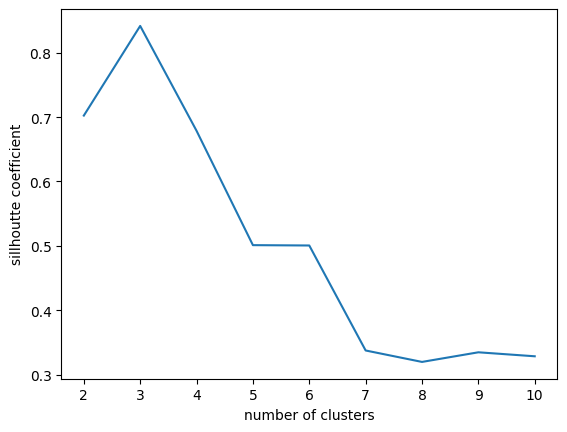

In [36]:
plt.plot(range(2,11),sillhoutte_coeff)
plt.xticks(range(2,11))
plt.xlabel("number of clusters")
plt.ylabel("sillhoutte coefficient")
plt.show()